# Курс аналитик данных на Python
## Модуль 7.1 А/Б-тестирование с помощью Python. Гипотезы

In [198]:
import pandas as pd #https://pandas.pydata.org/
import numpy as np #https://www.numpy.org/
import scipy as sc #https://www.scipy.org/
import matplotlib.pyplot as plt #https://matplotlib.org/
import seaborn as sns #https://seaborn.pydata.org/
import plotly  # import dash, jupyter_dash #https://plot.ly/
%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

**_Статистическая гипотеза (statistical hypothesys)_** — это определённое предположение о распределении вероятностей, лежащем в основе наблюдаемой выборки данных.

**_Проверка статистической гипотезы (testing statistical hypotheses)_** — это процесс принятия решения о том, противоречит ли рассматриваемая статистическая гипотеза наблюдаемой выборке данных.

**_Статистический тест или статистический критерий_** — строгое математическое правило, по которому принимается или отвергается статистическая гипотеза. 

**$H_0$** — основная гипотеза  
**$H_1$** — альтернативная гипотеза (может быть "не $H_0$")

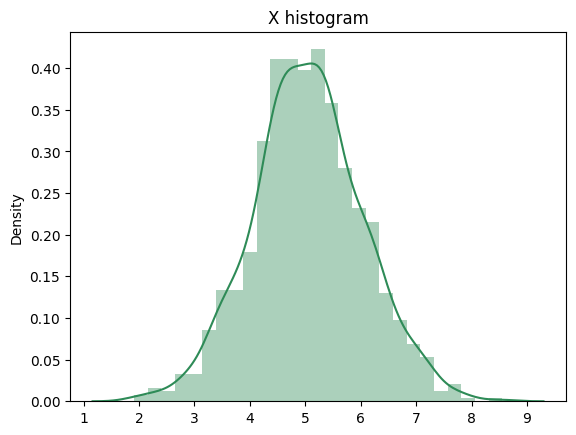

In [199]:
N = 1000
X = np.random.normal(5, 1, N)  # Матожидание 5, дисперсия 1
sns.distplot(X[:], color='seagreen')
plt.title('X histogram')

plt.show()

Пример простой гипотезы. Известно, что X имеет распределение $~\mathcal{N}(\mu, 1)$.  
**$H_0$**: $\mu = 1$  
**$H_1$**: $\mu \ne 1$  

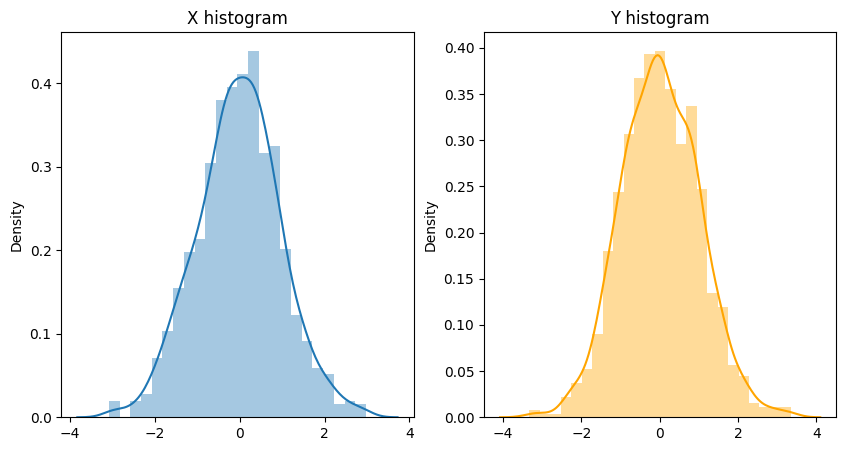

In [200]:
#Сгенерируем по 1000 образцов из стандартного нормального распределения, нарисуем их гистограммы
N = 1000
X = np.random.normal(0, 1, (N))
Y = np.random.normal(0, 1, (N))

fig = plt.figure()
fig.set_size_inches(10, 5)
plt.subplot(1, 2, 1)
sns.distplot(X)
plt.title('X histogram')

plt.subplot(1, 2, 2)
sns.distplot(Y, color='orange')
plt.title('Y histogram')

plt.show()

Пример более реальной гипотезы в тестировании:  
**$H_0$** -- выборки X и Y принадлежат нормальному распределению с одинаковыми математическим ожиданием и дисперсией.  
**$H_1$** -- выборки X и Y принадлежат к различным распределениям (возможно, различным только по параметрам/моментам), отрицание нулевой гипотезы.

In [201]:
#Выборочное среднее:
X_ = X.sum()/N
print('Выборочное среднее для X: {:.2}'.format(X_))
Y_ = Y.sum()/N
print('Выборочное среднее для Y: {:.2}'.format(Y_))

Выборочное среднее для X: -0.019
Выборочное среднее для Y: 0.022


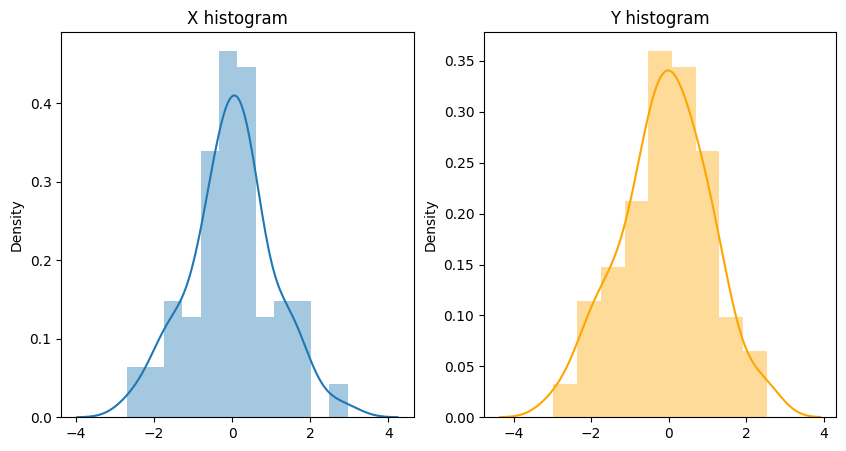

In [202]:
#Сгенерируем по 1000 образцов из стандартного нормального распределения, нарисуем их гистограммы
N = 100
X = np.random.normal(0, 1, (N))
Y = np.random.normal(0, 1, (N))

fig = plt.figure()
fig.set_size_inches(10, 5)
plt.subplot(1, 2, 1)
sns.distplot(X)
plt.title('X histogram')

plt.subplot(1, 2, 2)
sns.distplot(Y, color='orange')
plt.title('Y histogram')

plt.show()

In [203]:
#Выборочное среднее:
X_ = X.sum()/N
print('Выборочное среднее для X: {:.2}'.format(X_))
Y_ = Y.sum()/N
print('Выборочное среднее для Y: {:.2}'.format(Y_))

Выборочное среднее для X: -0.0048
Выборочное среднее для Y: -0.093


**Верная гипотеза**
|  | **$H_0$** | **$H_1$** |
|:-:| -: | -: |
| **$H_0$** | Верно принята | Неверно принята<br>(Ошибка *второго* рода) |
| **$H_1$** | Неверно принята<br>(Ошибка *первого* рода) | Верно отвергнута |

**Результат применения критерия**
Есть некоторые правила, позволяющие применять или отвергать гипотезу **$H_0$**

**_Уровень значимости_** = вероятность ошибки первого рода, $\alpha$ ($\alpha$-value). То есть мы отвергли **$H_0$**, когда она верна

**_Мощность критерия_** = (1 - вероятность ошибки второго рода),  $(1-\beta )$. Чем выше мощность критерия, тем выше его уровень значимости.

**_Домашнее задание_**  
Представтье, что вы продаёте чайники в интернете. Представим, что мы тестируем новую функциональность сайта, которая, предполагается, будет увеличивать продажи/выручку в день. Мы разделили всех пользователей случайным образом на две независимых группы, одной из них показываем старую функциональность, а другой новую. Проводим тест один месяц.    
1. Сгенерируйте две искусственных выборки, которые могли бы отражать характеристики продаж чайников (количество продаж в день, сумма продаж в день, что-нибудь ещё) в обеих группах.  
2. Визуализируйте эти данные. Постройте гистограммы, посчитайте описательные статистики с помощью таких функций, как: np.mean(), np.std(), np.median(), sc.stats.mode().
3. Попробуйте сформулировать разные гипотезы **$H_0$** и **$H_1$**.

In [204]:
# Подключаем нужные библиотеки
import numpy as np
import pandas as pd
import seaborn as sns

In [205]:
# Сгенерируем массив данных ДО
n = 1000
sales = np.random.random_integers(10,100, n)
sum_sales = np.random.random_integers(5000,25000, n)
grade = np.random.random_integers(5,10, n)
df_1 = pd.DataFrame({'sales' : sales, 'sum_sales' : sum_sales, 'grade' : grade})
df_1.head()

,sales,sum_sales,grade
0,58,13813,8
1,95,10603,8
2,26,7700,7
3,43,7088,5
4,90,22345,10


In [206]:
df_1.describe()

,sales,sum_sales,grade
count,1000.000000,1000.000000,1000.000000
mean,55.422000,15004.999000,7.453000
std,26.641691,5744.288545,1.710765
min,10.000000,5012.000000,5.000000
25%,32.000000,9925.750000,6.000000
50%,55.000000,14913.500000,7.000000
75%,78.000000,20126.000000,9.000000
max,100.000000,24997.000000,10.000000


In [207]:
# Сгенерируем массив данных ПОСЛЕ
n = 1000
sales = np.random.random_integers(20,150, n)
sum_sales = np.random.random_integers(10000,35000, n)
grade = np.random.random_integers(5,10, n)
df_2 = pd.DataFrame({'sales' : sales, 'sum_sales' : sum_sales, 'grade' : grade})
df_2.head()

,sales,sum_sales,grade
0,103,24160,8
1,135,32984,10
2,50,31170,6
3,74,23398,10
4,108,12059,8


In [208]:
df_2.describe()

,sales,sum_sales,grade
count,1000.000000,1000.000000,1000.000000
mean,83.992000,22466.025000,7.403000
std,37.285817,7159.525254,1.745175
min,20.000000,10014.000000,5.000000
25%,51.000000,16158.250000,6.000000
50%,85.000000,22602.000000,7.000000
75%,114.000000,28400.750000,9.000000
max,150.000000,34981.000000,10.000000


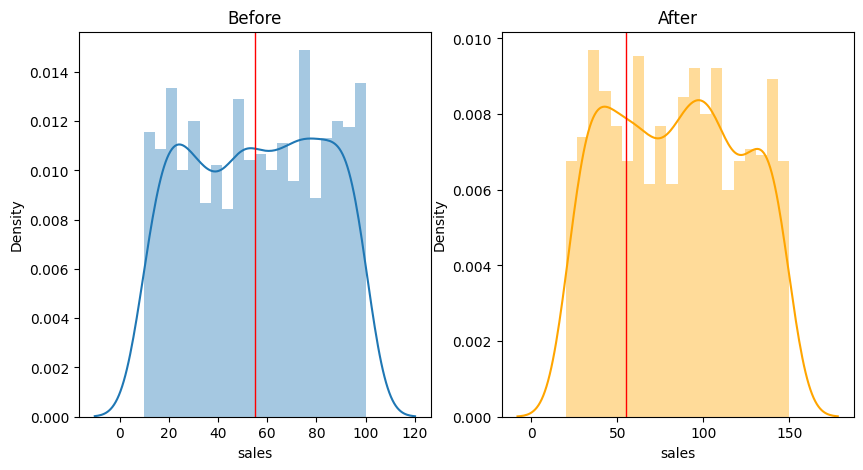

In [213]:
fig = plt.figure()
fig.set_size_inches(10, 5)
plt.subplot(1, 2, 1)
sns.distplot(df_1['sales'], x=df_1['sales'], bins=20)
plt.axvline(x=df_1['sales'].median(), linewidth=1, color='red')
plt.title('Before')

plt.subplot(1, 2, 2)
sns.distplot(df_2['sales'], x=df_2['sales'], bins=20, color='orange')
plt.axvline(x=df_1['sales'].median(), linewidth=1, color='red')
plt.title('After')

plt.show()

In [210]:
print(f'{np.mean(df_1)}, {np.std(df_1)}, {np.median(df_1)}, {sc.stats.mode(df_1)}')
print()
print(f'{np.mean(df_2)}, {np.std(df_2)}, {np.median(df_2)}, {sc.stats.mode(df_2)}')


sales           55.422
sum_sales    15004.999
grade            7.453
dtype: float64, sales          26.628367
sum_sales    5741.415682
grade           1.709910
dtype: float64, 55.0, ModeResult(mode=array([[  73, 6769,    5]]), count=array([[ 20,   2, 180]]))

sales           83.992
sum_sales    22466.025
grade            7.403
dtype: float64, sales          37.267170
sum_sales    7155.944596
grade           1.744302
dtype: float64, 85.0, ModeResult(mode=array([[   36, 10759,     5]]), count=array([[ 14,   3, 192]]))


**$H_0$** - количество продаж увеличилось после мат. стимулирования

**$H_1$** - количество продаж осталось неизменным